# Classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X = dataset.data[:,:2]
y = dataset.target

In [ ]:
X

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [7]:
X_train.shape

(120, 2)

In [8]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Bài 1: Hãy thống kê số lượng nhãn (label) trên tập training và tập test vừa chia. Vẽ biểu đồ phân bố nhãn (Gợi ý: sử dụng barplot trong thư viện seaborn).

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
# dict(zip(unique, counts))
unique, counts

(array([0, 1, 2]), array([39, 37, 44]))

In [10]:
class_labels = ["setosa", "versicolor", "virginica" ]

In [11]:
df_y_train_count = pd.DataFrame({"label_code":unique, 
                                    "count":counts,
                                        "class_labels":class_labels})

In [12]:
df_y_train_count

,label_code,count,class_labels
0,0,39,setosa
1,1,37,versicolor
2,2,44,virginica


In [14]:
def viz_class_label(df):
    unique, counts = np.unique(df, return_counts=True)
    class_labels = ["setosa", "versicolor", "virginica" ]
    df_count = pd.DataFrame({"label_code":unique, 
                                    "count":counts,
                                        "class_labels":class_labels})
    plt.figure(figsize=(10,8))
    ax = sns.barplot(x='label_code', y='count', hue = "class_labels", hue_order=class_labels,
                    data=df_count, dodge=False)
    return plt

Text(0.5, 1.0, 'So luong nhan tap y_train')

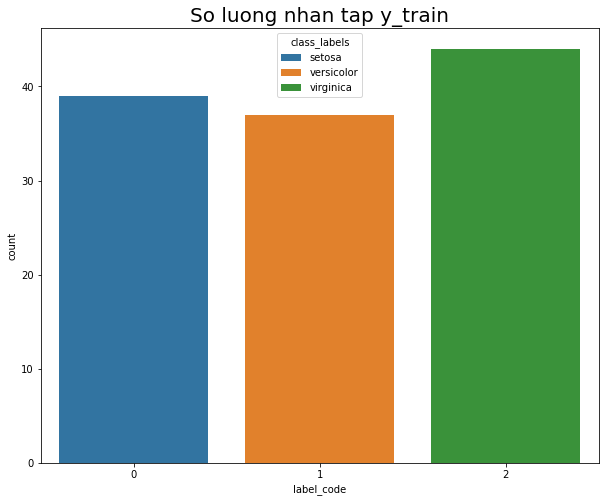

In [15]:
viz_class_label(y_train).title("So luong nhan tap y_train", fontdict={"fontsize":20})

Text(0.5, 1.0, 'So luong nhan tap y_test')

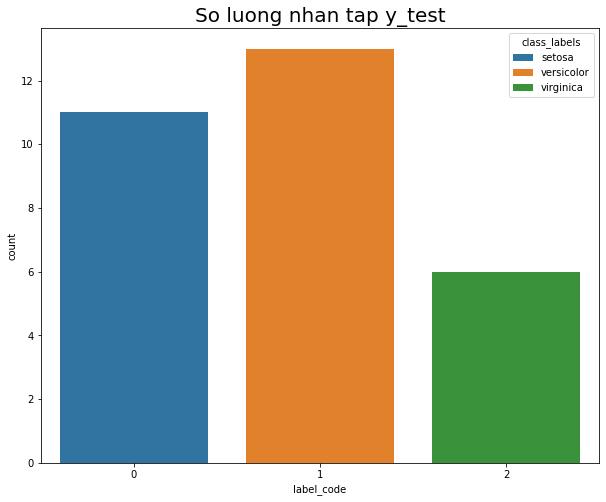

In [16]:
viz_class_label(y_test).title("So luong nhan tap y_test", fontdict={"fontsize":20})

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train[::10]

array([[ 0.61303014,  0.10850105],
       [ 1.0853487 , -0.12400121],
       [-0.33160699, -1.2865125 ],
       [ 0.14071157,  0.80600783],
       [ 0.61303014, -0.82150798],
       [ 1.55766726,  1.27101235],
       [ 0.96726906,  0.57350557],
       [-1.74856268, -0.12400121],
       [-1.04008484,  0.34100331],
       [-0.09544771,  2.20102139],
       [ 0.61303014,  0.34100331],
       [-0.33160699, -0.12400121]])

In [19]:
X_test[::10]

array([[-0.09544771, -0.58900572],
       [ 0.25879121, -1.05401024],
       [-0.33160699, -0.58900572]])

## Training the Logistic Regression model on the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred_lr = classifier_lr.predict(X_test)

In [25]:
compairdf = pd.DataFrame(data=np.array([y_pred_lr, y_test]).T,
                        columns={"y predict", "y true"})
compairdf.head(5)

,y predict,y true
0,1,2
1,1,1
2,0,0
3,2,2
4,0,0


### Making the Confusion Matrix, Accuracy Score

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
cfm_lr = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)
asp_lr = accuracy_score(y_true=y_test, y_pred=y_pred_lr)*100 #accuracy score percent


In [34]:
cfm_lr

array([[11,  0,  0],
       [ 0,  8,  5],
       [ 0,  3,  3]])

In [35]:
asp_lr

73.33333333333333

## Trainning the K Nearest Neighbors model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 15)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [48]:
y_pred_knn = classifier_knn.predict(X_test)


In [49]:
compairdf2 = pd.DataFrame(data=np.array([y_pred_knn, y_test]).T,
                        columns={"y predict", "y true"})
compairdf2.head(5)


,y predict,y true
0,1,2
1,1,1
2,0,0
3,2,2
4,0,0


### Making the Confusion Matrix, Accuracy Score

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
cfm_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
asp_knn = accuracy_score(y_true=y_test, y_pred=y_pred_knn)*100 #accuracy score percent


In [51]:
cfm_knn

array([[11,  0,  0],
       [ 0,  5,  8],
       [ 0,  2,  4]])

In [52]:
asp_knn

66.66666666666666

## Đánh giá 2 mô hình vừa xây dựng trên 3 độ đo sau: precision_score, recall_score và f1_score sử dụng macro average.

### Bảng báo cáo độ đo của model Logistic Regression

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30



### Bảng báo cáo độ đo của model KNN

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.71      0.38      0.50        13
           2       0.33      0.67      0.44         6

    accuracy                           0.67        30
   macro avg       0.68      0.68      0.65        30
weighted avg       0.74      0.67      0.67        30



Accuracy của Logistic Regression (LR) = 0.73, của KNN là 0.67

precision của LR với macro avg = 0.70, 0.68 là của KNN

recall của LR với macro avg = 0.71, của KNN là 0.68

f1-score của LR sử dụng macro avg = 0.70 trong khi đó của KNN là 0.65

Ở bài toán với dataset trên đưa vào các model với hai thuộc tính thì LR cho kết quả tốt hơn KNN ở mọi độ đo



## Grid Search

In [98]:
# Create logistic regression
from sklearn import linear_model, datasets
logistic = linear_model.LogisticRegression(solver='liblinear',class_weight='balanced', max_iter=1000)

In [99]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [100]:
# Create grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [101]:
best_model = clf.fit(X_train, y_train)

In [102]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [103]:
from sklearn.linear_model import LogisticRegression
classifier_gs = LogisticRegression(penalty='l1', C=1.0, random_state=0,solver='liblinear',class_weight='balanced', max_iter=1000)
classifier_gs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=0, solver='liblinear')

In [104]:
y_pred_gs = classifier_gs.predict(X_test)

In [105]:
y_pred_gs

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix
cfm_gs = confusion_matrix(y_true=y_test, y_pred=y_pred_gs)
asp_gs = accuracy_score(y_true=y_test, y_pred=y_pred_gs)*100 #accuracy score percent
asp_gs

70.0